<a href="https://colab.research.google.com/github/ucfilho/Raianars_paper_One/blob/master/DE_OPTIM_ANN_BUG_Insight_DIVERSIDADE_3x4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import time
import matplotlib.pyplot as plt
import numpy as np
from random import randint
from scipy import optimize
import pandas as pd
from sklearn.metrics import confusion_matrix

#global syn0_F,syn1_F,X_max_F,X_min_F

In [0]:
Fc=0.1 # fator de correcao parametros da ANN
its=1 #10 # quantas vezes vai usar o NPAR antes de alterar de novo
ITE=100 #10 # PONTOS quantas vezes vai alteral NPAR 

mut=0.75
crossp=0.5;

In [3]:
!git clone https://github.com/ucfilho/Raianars_paper_One #clonar do Github
%cd Raianars_paper_One

fatal: destination path 'Raianars_paper_One' already exists and is not an empty directory.
/content/Raianars_paper_One


In [0]:
import Go2Ann

In [5]:
!git clone https://github.com/ucfilho/ANN_read_matrix #clonar do Github
%cd ANN_read_matrix

fatal: destination path 'ANN_read_matrix' already exists and is not an empty directory.
/content/Raianars_paper_One/ANN_read_matrix


In [0]:
ANN_F=pd.read_csv('ANN_INSIGHT_Valor_F.csv')

In [0]:
ANN_CR=pd.read_csv('ANN_INSIGHT_CR.csv')

In [0]:
syn0_F,syn1_F,X_max_F,X_min_F=Go2Ann.GetMatriz(ANN_F)

In [0]:
syn0_CR,syn1_CR,X_max_CR,X_min_CR=Go2Ann.GetMatriz(ANN_CR)

In [0]:
ANN_CR=pd.read_csv('ANN_INSIGHT_CR.csv')

In [11]:
############################### Importar códigos
!git clone https://github.com/ucfilho/Raianars_paper_One/ #clonar do Github
%cd Raianars_paper_One
import de_soma_Insight
import de_bounds_matriz
import Function
import Go2MinMax
from AvaliaX import AvaliaX
from GeraIndices import GeraIndices

fatal: destination path 'Raianars_paper_One' already exists and is not an empty directory.
/content/Raianars_paper_One/ANN_read_matrix/Raianars_paper_One


In [0]:
############################### DADOS DE ENTRADA 
RUNS=1 #NÚMERO DE RODADAS
#mut=0.8
#crossp=0.7
  ############################### Função

dim=10
#fchoice='Rastrigin' #fchoice='Michalewicz'
fchoice='Schwefel'

MIN,MAX=Go2MinMax.Intervalo(dim,fchoice)
Fun=Function.Rastrigin
PAR=len(MAX) #NUM DE PARAMETROS A SER OTIMIZADOS


In [0]:
fields = ['DI RELATIVO','FRAC Its','Fo','CRo']

#MAT_IND=GeraIndices(X,BESTo,FOBESTo,DIo,MAT_INDo,SOMA,TOTAL,Fun)


In [0]:
##################################### 

#TOTAL=7*dim*its*ITE
TOTAL=10*dim*its*ITE

dimensions=len(MAX)
start_time = time.time() #INICIALIZA CONTAGEM DO TEMPO

p=int(TOTAL/its/ITE) 
NPAR=p

MAX_P=np.zeros(ITE) # ATENCAO para variar F e Cr MAX_P passa a ser 3 vezes maior
MIN_P=np.zeros(ITE) # ATENCAO para variar F e Cr MIN_P passa a ser 3 vezes maior

for i in range(dim):
  MAX_P[i]=MAX[i] 
  MIN_P[i]=MIN[i]


for i in range(RUNS):
  SOMA=0
  pop = np.random.rand(NPAR, dimensions)
  diff=np.zeros(PAR)
  for ii in range(PAR):
    diff[ii] = MAX[ii]-MIN[ii]
  X = MIN + pop * diff
    
  PONTOS=ITE # DIVISOES DA POPULACAO
 
 ############################################################
  #bounds=[(5*dim, 15*dim)] * PONTOS # ITE
  #bounds=[(3*dim, 12*dim)] * PONTOS # ITE
  #bounds=[(4*dim, 16*dim)] * PONTOS
  
  # nao pode ser assim pq o bounds vale p o DE nao dos parametros
  #p=int(TOTAL/its/ITE) 
  bounds=[(p, p)] * PONTOS


  DIo=1e99
  
  CRo=crossp;Fo=mut;
  Fitness = np.asarray([Fun(ind) for ind in X])
  XY,BEST_XY,BESTo,FOBESTo=AvaliaX(X,Fitness)
  nrow,ncol=X.shape

  QUANT=17;MAT_INDo=np.zeros((1,QUANT)); # quantos indices esta fazendo
  MAT_INDo[0,5]=nrow  # VALOR NP
  MAT_INDo[0,6]=Fo    # VALOR Fo   
  MAT_INDo[0,7]=CRo   # VALOR CRo
  
  MAT_INDo=GeraIndices(X,BESTo,FOBESTo,DIo,MAT_INDo,SOMA,TOTAL,syn0_F,
                       syn1_F,X_max_F,X_min_F,syn0_CR,syn1_CR,X_max_CR,
                       X_min_CR,Fc,fields,Fun)
  
  DIo=np.copy(MAT_INDo[0,0])
  pd.set_option('display.max_columns', 30)  
  MAT_INDo[0,15]=Fo    # VALOR Fo   
  MAT_INDo[0,16]=CRo   # VALOR CRo
  MAT=[]
  for loop in range(ITE):
    X,BEST,FOBEST,XY,BEST_XY,SOMA= de_soma_Insight.de(MAX,MIN, mut, crossp,NPAR,
                                                      its,Fun,X,SOMA,TOTAL)
    
    MAT_IND=GeraIndices(X,BESTo,FOBESTo,DIo,MAT_INDo,SOMA,TOTAL,syn0_F,
                        syn1_F,X_max_F,X_min_F,syn0_CR,syn1_CR,X_max_CR,
                        X_min_CR,Fc,fields,Fun)
    
    BESTo=np.copy(BEST);FOBESTo=np.copy(FOBEST);
    MAT.append(MAT_IND.ravel())
    
    MAT_INDo[0,6]=MAT_IND[0,15]   # VALOR Fo   
    MAT_INDo[0,7]=MAT_IND[0,16]   # VALOR CRo
    
NOMES=['DIVERSIDADE (DI)',  'DI RELATIVO','FRAC Its',
           'VELOC FOBJ','VELOC X','NP','Fo','CRo','fmin','fmax',
           'AD_fmin','AD_fmax','DELTA FOBJ','DELTA VX','r_fitness',
           'F','CR']
df  = pd.DataFrame(MAT, columns=NOMES)
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 30)


In [15]:
print(BEST)

[12.09579815  0.27004221 -0.31606175 -1.89244723 11.33239835  4.84566141
 -0.84080974 -1.39499536  1.90648573 -0.23160796]


In [0]:
XY,BEST_XY,BEST,FOBEST=AvaliaX(X,Fitness)

In [17]:
print(df)

    DIVERSIDADE (DI)  DI RELATIVO  FRAC Its  VELOC FOBJ  VELOC X     NP  \
0         878.286468     0.962805      0.01         0.0      0.0  100.0   
1         859.320969     0.942015      0.02         0.0      0.0  100.0   
2         832.953917     0.913110      0.03         0.0      0.0  100.0   
3         804.977454     0.882442      0.04         0.0      0.0  100.0   
4         778.783982     0.853727      0.05         1.0      2.0  100.0   
..               ...          ...       ...         ...      ...    ...   
95         37.211363     0.040792      0.96         0.0      0.0  100.0   
96         35.335082     0.038735      0.97         0.0      0.0  100.0   
97         33.944767     0.037211      0.98         0.0      0.0  100.0   
98         33.375405     0.036587      0.99         0.0      0.0  100.0   
99         32.748892     0.035900      1.00         0.0      0.0  100.0   

          Fo       CRo           fmin          fmax  AD_fmin  AD_fmax  \
0   0.750000  0.500000  18

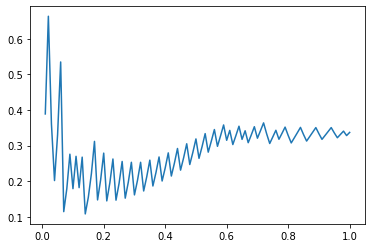

In [18]:
plt.plot(df['FRAC Its'],df['F'])

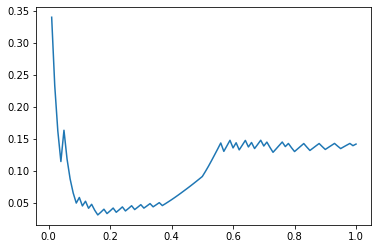

In [19]:
plt.plot(df['FRAC Its'],df['CR'])

In [20]:
print('FOBEST=',FOBEST)

FOBEST= 180245.4678046632
